# Data Analysis 
##  Pareto Analysis 
- Data Used - Retail Store 
- Business Problems Address
    - Identify Products generating 80 % plus revenue
    


In [1]:
# Importing Packages

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
# Reading data from CSV
data = pd.read_csv("pareto_py.csv")

In [3]:
# Observing imported Data
print(data.info())
print(data.head())
print(data.tail())
print(data.descridbe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 4 columns):
Product    1326 non-null object
Month      1326 non-null object
Store      1326 non-null object
Price      1326 non-null object
dtypes: object(4)
memory usage: 41.5+ KB
None
    Product     Month     Store   Price
0   Tape 10     April  downtown   $2.50
1  Safety 8    August    uptown  $10.00
2  Safety 2  February    uptown  $10.00
3  Safety 8  November    uptown  $10.00
4   Tape 10   October    uptown   $2.50
       Product     Month     Store   Price
1321   Tape 10  November    uptown   $2.50
1322  Safety 1   October  downtown  $12.00
1323  Safety 8   October  downtown  $10.00
1324    Tape 6   October    uptown   $2.50
1325  Safety 8  December  downtown  $10.00
         Product     Month     Store   Price
count       1326      1326      1326    1326
unique        30        12         2       6
top     Safety 8  November  downtown  $10.00
freq         505       127       680     6

In [75]:
# Preparing data for computation

#test
#print( data.Price.apply(lambda x : float(x.strip("$"))).reset_index().sum())
data_new = data
data_new["Price_New"] = data.apply(lambda row: float(row["Price"].strip("$")), axis=1).reset_index(drop=True)
data_new = data_new.drop("Price", 1)
print(data_new.head())

    Product     Month     Store  Price_New
0   Tape 10     April  downtown        2.5
1  Safety 8    August    uptown       10.0
2  Safety 2  February    uptown       10.0
3  Safety 8  November    uptown       10.0
4   Tape 10   October    uptown        2.5


In [74]:
# Sorting Price with descending
data_new = data_new.sort_values("Price_New",ascending = False)
print(data_new.head())

      Product      Month     Store  Price_New
725  Safety 1    October    uptown       12.0
716  Safety 1       June  downtown       12.0
974  Safety 1  September    uptown       12.0
967  Safety 1      March  downtown       12.0
581  Safety 1      March    uptown       12.0


        Product  Price_New
6    Adhesive 4      238.0
7      Safety 6      220.0
8    Adhesive 5      168.0
9      Safety 3      140.0
10       Tape 1       93.0
11   Adhesive 9       91.0
12    Safety 10       90.0
13     Safety 4       90.0
14  Adhesive 10       70.0
15   Adhesive 7       70.0
16       Tape 6       67.5
17   Adhesive 2       63.0
18     Safety 5       50.0
19   Adhesive 3       49.0
20       Tape 5       47.5
21   Adhesive 8       42.0
22   Adhesive 6       42.0
23     Safety 9       40.0
24       Tape 4       35.0
25       Tape 9       30.0
26       Tape 2       25.0
27   Adhesive 1       24.0
28       Tape 8       20.0
29       Tape 3       15.0
    Product  Price_New
0  Safety 8     5050.0
1  Safety 2      740.0
2  Safety 1      732.0
3   Tape 10      490.0
4  Safety 7      420.0
5    Tape 7      340.0


<Container object of 6 artists>

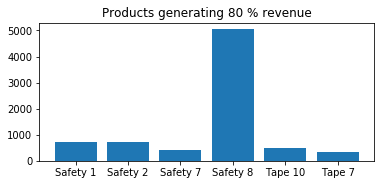

In [80]:
# sorting with products producing top 80 % pricce

x= data_new.groupby(["Product"]).Price_New.sum().sort_values(ascending=False).reset_index()
x_80= np.percentile(x["Price_New"],80)
x_80_revenue_products= x[x.Price_New > x_80]
x_20_revenue_products = x[x.Price_New < x_80]
ax = plt.subplot()

print(x_20_revenue_products)
print(x_80_revenue_products)
plt.subplots_adjust(bottom = 0.4, wspace= 0.4)
plt.title("Products generating 80 % revenue")
plt.bar(x_80_revenue_products.Product, x_80_revenue_products.Price_New)
